## K-Means

### K_Means 실습

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

In [ ]:
# 데이터 생성
# make_blobs: 군집화에 적합한 샘플 데이터를 생성하는 함수
# n_sample: 데이터 포인트 수, centers: 클러스터 수, random_state: 재현성을 위한 시드값

n_sapmle = 300
n_clusters = 3

In [3]:
X, y = make_blobs(n_samples=n_sapmle, centers=n_clusters, cluster_std=1.0, random_state=42)

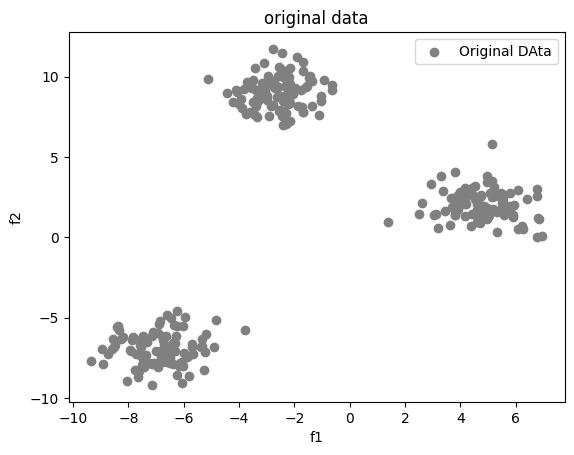

In [4]:
# 그래프
plt.scatter(X[:,0], X[:,1], c='gray', label='Original DAta')
plt.title('original data')
plt.xlabel('f1')
plt.ylabel('f2')
plt.legend()
plt.show()

In [5]:
# K-Means 모델 생성 및 학습
# KMeans 클래스: 사이킷런에서 제공하는 K-Means 구현
# n_clusters: 클러스터 개수, random_state: 결과 재현성을 위한 시드값
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

In [6]:
# 학습
cluster_labels = kmeans.fit_predict(X)

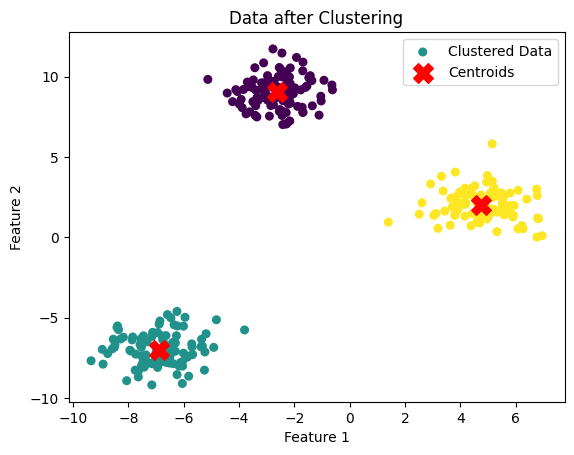

In [9]:
#군집화 결과 시각화
plt.scatter(X[:,0], X[:,1], c=cluster_labels, cmap='viridis', s=30, label='Clustered Data')

# 클러스터 중심 시각화
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
s=200, c='red', label="Centroids", marker='X')
plt.title("Data after Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()

In [10]:
# 5. 모델 세부 정보 확인
# kmeans.cluster_centers_: 클러스터 중심 좌표
# kmeans.inertia_: 클러스터 내 거리 합 (WCSS)
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Inertia (WCSS):", kmeans.inertia_)

Cluster Centers:
 [[-2.63323268  9.04356978]
 [-6.88387179 -6.98398415]
 [ 4.74710337  2.01059427]]
Inertia (WCSS): 566.8595511244131


In [11]:
# 최적의 K 찾기
# 다양한 K 값에 대한 Inertia 계산
result=[]

for k in range(1,10):
    kmeans_temp = KMeans(n_clusters=k,random_state=42)
    kmeans_temp.fit(X)
    result.append(kmeans_temp.inertia_)



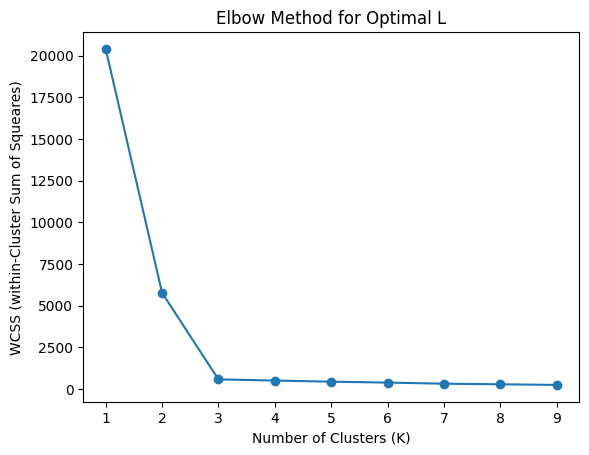

In [13]:
# 엘보우 그래프 그리기
plt.plot(range(1,10), result, marker='o')
plt.title('Elbow Method for Optimal L')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS (within-Cluster Sum of Squeares)')
plt.show()
# K의 최적값 = 3!

### 실루엣 점수

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, silhouette_samples

In [15]:
#실루엣 스코어. 1에 가까울수록 응집과 분리가 잘 되어있음.
sil_avg = silhouette_score(X, cluster_labels)
print(sil_avg)

0.8480303059596955


In [16]:
#시각화를 위한 점수 계산
sil_values = silhouette_samples(X, cluster_labels)
print(sil_values)

[0.90593228 0.90295138 0.78292932 0.82801009 0.85347199 0.87164904
 0.87660124 0.87599826 0.87967189 0.85542272 0.8185558  0.87259676
 0.74387596 0.84157115 0.90743902 0.87272287 0.87580064 0.72626456
 0.86269038 0.78265318 0.78367684 0.88236857 0.86744598 0.91367619
 0.87177917 0.84973102 0.88991326 0.69411153 0.86247358 0.84701361
 0.85559028 0.86435444 0.88923506 0.81530708 0.84205606 0.84407722
 0.89049865 0.87854612 0.90341598 0.76522292 0.84764565 0.8725714
 0.91062018 0.81940318 0.8287758  0.82800398 0.91293113 0.86613733
 0.9101851  0.81830486 0.87279139 0.85655332 0.90111562 0.76870605
 0.87629642 0.52748913 0.90894375 0.83452366 0.86343982 0.86125249
 0.88918749 0.76979529 0.86487455 0.69836723 0.88372903 0.82959834
 0.85491415 0.88631591 0.8734638  0.86485178 0.85190407 0.85010535
 0.90260065 0.86305493 0.80711153 0.90990924 0.85777116 0.85024895
 0.87568057 0.85626803 0.86869093 0.86376756 0.89694868 0.85592685
 0.86287428 0.88174667 0.87343813 0.75129446 0.81999592 0.82172

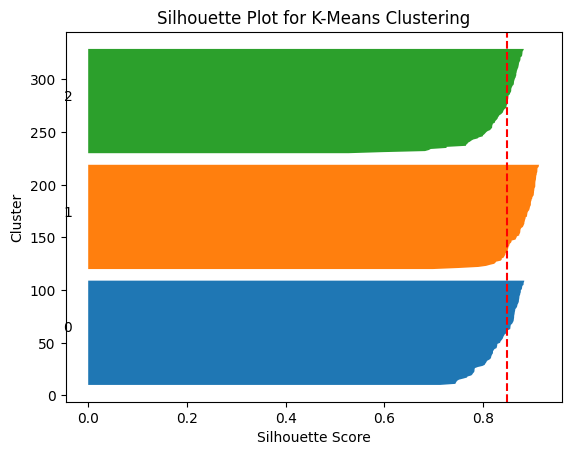

In [22]:
# 시각화 준비
y_lower = 10

for i in range(3): # 각 클러스터에 대해 반복
    ith_cluster_sil_values = sil_values[cluster_labels == i]
    ith_cluster_sil_values.sort()
    size_cluster_i = ith_cluster_sil_values.shape[0]
    y_upper = y_lower + size_cluster_i

    # 클러스터별 막대 그리기
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_sil_values)
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # 클러스터 번호
    y_lower = y_upper + 10 # 다음 클러스터로 이동

# 그래프 설정
plt.axvline(x=sil_avg, color="red", linestyle="--") # 평균 실루엣 점수
plt.title("Silhouette Plot for K-Means Clustering")
plt.xlabel("Silhouette Score")
plt.ylabel("Cluster")
plt.show()


#초록색의 경우 낮은 점수부터 올라가기 때문에, 덜 응집되어 있다고 볼 수 있다!
#꺾여있는 부분을 통해 분리, 분포등을 파악

### PCA 예제

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_iris #4차원
from sklearn.preprocessing import StandardScaler

In [25]:
# 데이터셋 로드
iris = load_iris()

x = iris.data #특성 데이터: 4개(4차원)
y = iris.target #타깃 데이터 0, 1, 2

In [26]:
#데이터 정규화
#PCA는 데이터의 스케일에 민감하므로 정규화 필수
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

In [ ]:
#PCA 객체 생성
pca = PCA(n_components=2) #데이터를 2차원으로 축소

In [28]:
x_pca = pca.fit_transform(x_scaled)

In [29]:
#PCA 출력
#첫 번째 주성분과 두 번째 주성분이 전체 분산의 약 95%이상을 설명
print(pca.explained_variance_ratio_)    

[0.72962445 0.22850762]


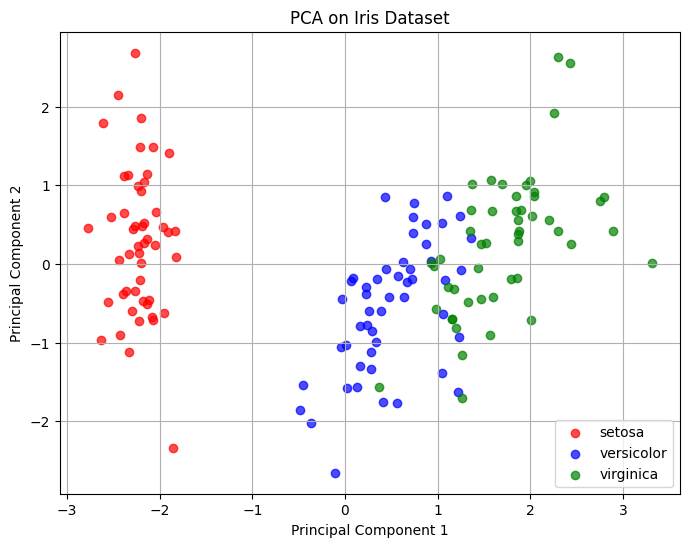

In [33]:
#PCA 결과 시각화
# - 두 개의 주성분을 사용해 데이터를 2D 플롯으로 시각화
plt.figure(figsize=(8, 6))
for target, color, label in zip([0, 1, 2], ['red', 'blue', 'green'], iris.target_names):
    plt.scatter(x_pca[y == target, 0], # 첫 번째 주성분
                x_pca[y == target, 1], # 두 번째 주성분
                color=color, label=label, alpha=0.7)
plt.title('PCA on Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid()
plt.show()

### Isolation Forest

In [34]:
import numpy as np
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt


In [ ]:
#Isolation Forest: 이상치 탐지

In [89]:
# 1. 데이터 생성
# 시드 고정: 재현성을 위해 난수 시드를 고정
np.random.seed(42)

In [90]:
#정상 100개, 이상 10개 --> 2차원
normal_traffic = np.random.normal(loc=50, scale=10, size=(100,2))
#print(normal_traffic)
# 비정상 트래픽 데이터 생성
# 일정 범위(low=100, high=150)에서 균등분포로 비정상적으로 높은 값 생성 (10개의 샘플, 2차원)
ano_traffic = np.random.uniform(low=100, high=150, size=(10,2))
print(ano_traffic)

[[143.8686536  137.03843089]
 [134.85078705 135.1242042 ]
 [117.97455756 114.67959221]
 [140.46805777 140.50566973]
 [143.35361593 145.66202763]
 [125.56711994 125.07581473]
 [139.91475895 132.49819654]
 [135.09834386 139.78963347]
 [144.50026709 116.89975784]
 [118.77914763 104.69909699]]


In [91]:
# 정상 데이터와 비정상 데이터를 결합
traffic_data = np.vstack((normal_traffic, ano_traffic))


In [92]:
#데이터를 DataFrame으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=['Request Count', 'Response Time'])


In [80]:
# 2. Isolation Forest 모델 생성 및 학습
# Isolation Forest 초기화
# - n_estimators: 트리의 개수 (모델 복잡도에 영향을 미침)
# - contamination: 이상치로 간주할 데이터의 비율 (10%로 설정)
# - random_state: 난수 시드 (재현성을 위해 설정)

model = IsolationForest(n_estimators=100, contamination=0.09, random_state=42)

In [81]:
# 모델 학습 후 예측 수행
# - fit_predict: 데이터를 학습하면서 이상치를 탐지 (-1: 이상치, 1: 정상)
traffic_df['Anomaly Score'] = model.fit_predict(traffic_data)
traffic_df

,Request Count,Response Time,Anomaly Score
0,54.967142,48.617357,1
1,56.476885,65.230299,1
2,47.658466,47.658630,1
3,65.792128,57.674347,1
4,45.305256,55.425600,1
...,...,...,...
105,125.567120,125.075815,-1
106,139.914759,132.498197,-1
107,135.098344,139.789633,-1
108,144.500267,116.899758,-1


In [82]:
# 이상 탐지 결과를 해석하여 "Normal" 또는 "Anomaly"로 표시
traffic_df['Anomaly'] = traffic_df['Anomaly Score'].apply(
    lambda x: 'Normal' if x == 1 else 'Anomaly')

In [83]:
# 3. 비정상 데이터의 범위 확인 - 이상 데이터만 필터링
ano_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]

In [84]:
# 이상 범위를 출력
min_request_count = ano_data["Request Count"].min()
max_request_count = ano_data["Request Count"].max()
min_response_time = ano_data["Response Time"].min()
max_response_time = ano_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~{max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~{max_response_time:.2f}")

비정상 데이터 범위:
- 요청 수 (Request Count): 117.97 ~144.50
- 응답 시간 (Response Time): 104.70 ~145.66


In [85]:
traffic_df.describe()

,Request Count,Response Time,Anomaly Score
count,110.000000,110.000000,110.000000
mean,56.625555,57.509043,0.818182
std,26.194878,24.978230,0.577591
min,23.802549,30.124311,-1.000000
25%,43.418818,44.487168,1.000000
50%,50.592195,52.145575,1.000000
75%,56.421832,58.490949,1.000000
max,144.500267,145.662028,1.000000


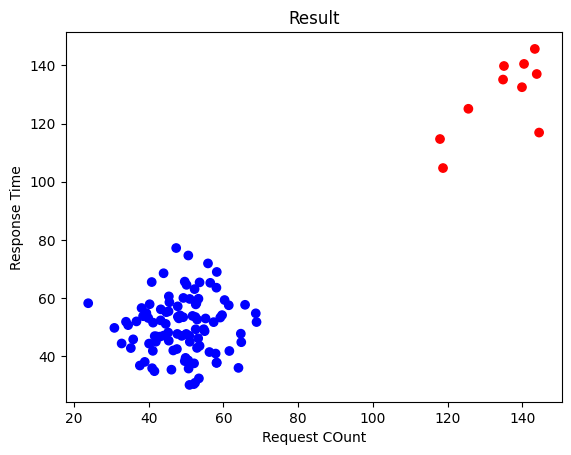

In [86]:
plt.scatter(
    traffic_df['Request Count'], traffic_df['Response Time'],
    c = traffic_df['Anomaly Score'].map({1: 'blue', -1: 'red'}),
    label = 'Traffic'
)

plt.title('Result')
plt.xlabel('Request COunt')
plt.ylabel('Response Time')

plt.show()


### DBSCAN

In [88]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


In [100]:
# 1. 데이터 생성 : 위와 같음
# 난수 시드 고정
np.random.seed(42)

# 정상 트래픽 데이터 생성 (평균: 50, 표준편차: 10)
normal_traffic = np.random.normal(loc=50, scale=10, size=(100, 2))

# 비정상 트래픽 데이터 생성 (비정상적으로 높은 값)
anomalous_traffic = np.random.uniform(low=100, high=150, size=(10,2))

# 데이터 결합
traffic_data = np.vstack((normal_traffic, anomalous_traffic))

# 데이터프레임으로 변환
traffic_df = pd.DataFrame(traffic_data, columns=["Request Count","Response Time"])

In [101]:
# 2. DBSCAN 모델 생성
# eps: 클러스터의 반경 (밀도를 정의)
# min_samples: 한 클러스터를 구성하기 위한 최소 샘플 수

dbscan = DBSCAN(eps=15, min_samples=5)

In [102]:
# DBSCAN 모델 적용
# fit_predict: 클러스터링 수행 (-1은 이상치, 나머지는 클러스터 ID)

traffic_df['Cluster'] = dbscan.fit_predict(traffic_df)

In [103]:
traffic_df

,Request Count,Response Time,Cluster
0,54.967142,48.617357,0
1,56.476885,65.230299,0
2,47.658466,47.658630,0
3,65.792128,57.674347,0
4,45.305256,55.425600,0
...,...,...,...
105,125.567120,125.075815,1
106,139.914759,132.498197,1
107,135.098344,139.789633,1
108,144.500267,116.899758,-1


In [106]:
# 3. 이상치 탐지
# 이상치는 Cluster 값이 -1인 데이터
traffic_df['Anomaly'] = traffic_df['Cluster'].apply(lambda x: "Anomaly" if x == -1 else "Normal")

traffic_df


,Request Count,Response Time,Cluster,Anomaly
0,54.967142,48.617357,0,Normal
1,56.476885,65.230299,0,Normal
2,47.658466,47.658630,0,Normal
3,65.792128,57.674347,0,Normal
4,45.305256,55.425600,0,Normal
...,...,...,...,...
105,125.567120,125.075815,1,Normal
106,139.914759,132.498197,1,Normal
107,135.098344,139.789633,1,Normal
108,144.500267,116.899758,-1,Anomaly


In [108]:
# 이상치 범위 확인
anomalous_data = traffic_df[traffic_df['Anomaly'] == "Anomaly"]
min_request_count = anomalous_data["Request Count"].min()
max_request_count = anomalous_data["Request Count"].max()
min_response_time = anomalous_data["Response Time"].min()
max_response_time = anomalous_data["Response Time"].max()
print(f"비정상 데이터 범위:")
print(f"- 요청 수 (Request Count): {min_request_count:.2f} ~ {max_request_count:.2f}")
print(f"- 응답 시간 (Response Time): {min_response_time:.2f} ~ {max_response_time:.2f}")

비정상 데이터 범위:
- 요청 수 (Request Count): 117.97 ~ 144.50
- 응답 시간 (Response Time): 104.70 ~ 116.90


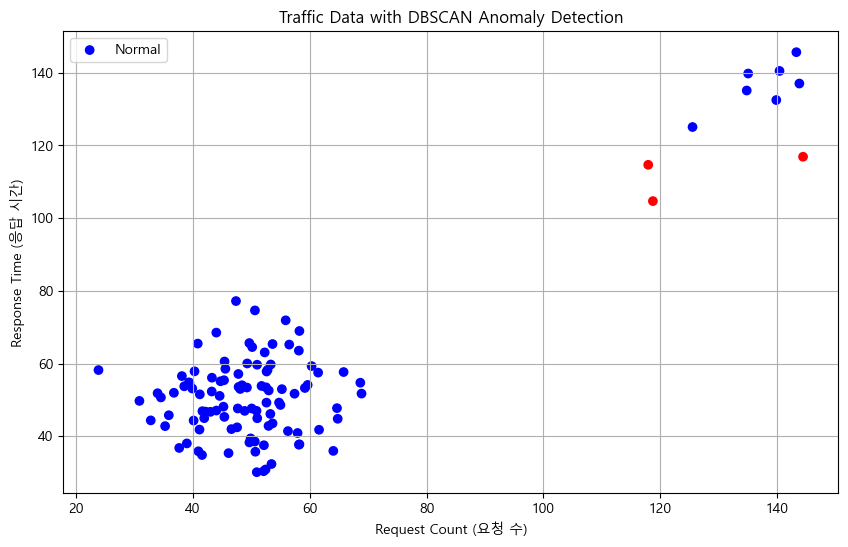

In [111]:
# 시각화
plt.rcParams['font.family'] = 'Malgun Gothic' # 한글 폰트 설정
plt.figure(figsize=(10, 6))
plt.scatter(
    traffic_df["Request Count"], traffic_df["Response Time"],
    c=traffic_df['Anomaly'].map({"Normal": "blue", "Anomaly":"red"}), # 색상 매핑
    label="Traffic"
)
plt.title("Traffic Data with DBSCAN Anomaly Detection")
plt.xlabel("Request Count (요청 수)")
plt.ylabel("Response Time (응답 시간)")
plt.legend(["Normal", "Anomaly"])
plt.grid()
plt.show()


In [ ]:
# 5. 결과 출력
# 전체 데이터프레임 출력
print("전체 데이터와 DBSCAN 이상 탐지 결과:")
print(traffic_df)